In [ ]:
try:
    import open_clip
    from optim_utils import * 
except ModuleNotFoundError:
    # You only really need this safety net if you want to run these notebooks directly in the examples directory
    # Don't worry about this if you installed the package or moved the notebook to the main directory.
    import os; os.chdir("..")
    import open_clip
    from optim_utils import * 

import torch
import mediapy as media
import argparse

## Load Arguments

In [2]:
args = argparse.Namespace()
args.__dict__.update(read_json("sample_config.json"))

args

Namespace(prompt_len=16, iter=3000, lr=0.1, weight_decay=0.1, prompt_bs=1, loss_weight=1.0, print_step=100, batch_size=1, clip_model='ViT-H-14', clip_pretrain='laion2b_s32b_b79k')

## Load Clip Model

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, _, preprocess = open_clip.create_model_and_transforms(args.clip_model, pretrained=args.clip_pretrain, device=device)

## Load Diffusion Model

In [4]:
from diffusers import DPMSolverMultistepScheduler, StableDiffusionPipeline

model_id = "stabilityai/stable-diffusion-2-1-base"
scheduler = DPMSolverMultistepScheduler.from_pretrained(model_id, subfolder="scheduler")

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    scheduler=scheduler,
    torch_dtype=torch.float16,
    revision="fp16",
    )
pipe = pipe.to(device)

image_length = 512

Error caught was: No module named 'triton'
Fetching 12 files: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 334.64it/s]


## Load Target Image


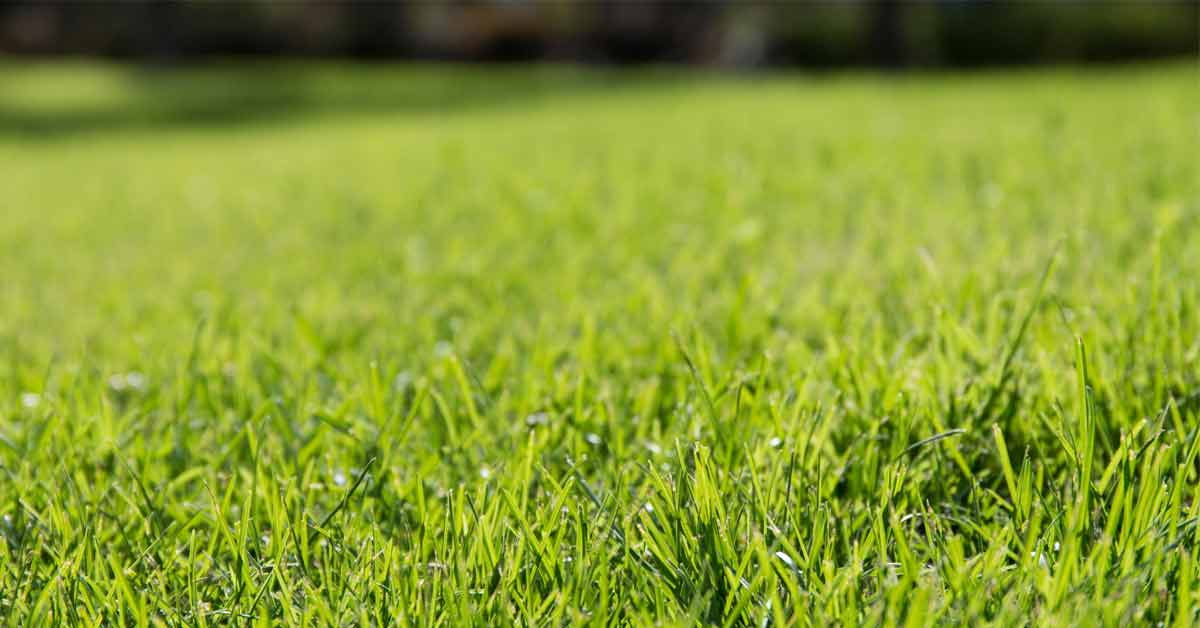

In [5]:
urls = [
        "https://www.pennington.com/-/media/Project/OneWeb/Pennington/Images/blog/seed/10-Surprising-Facts-About-Grass/grass_10surprising_opengraph.jpg",
       ]

orig_images = list(filter(None,[download_image(url) for url in urls]))
media.show_images(orig_images)

## Optimize Prompt

In [6]:
learned_prompt = optimize_prompt(model, preprocess, args, device, target_images=orig_images)


step: 0, lr: 0.1, cosim: 0.048, text: apprenticeships foul dieselhorrifying wannaballroom kindle wyedexterhamiljihoon offset virtually cayotaku moonlight 

step: 100, lr: 0.1, cosim: 0.331, text: majelay fai terms healthy lawn quantity strate sheets richland ️# sheffieldissuper sustainability durable durable nutrient 

step: 200, lr: 0.1, cosim: 0.376, text: satysolution ucl owensynthetic lawn fertilimixture secured perth portray 🇨�lng vegetation err synthetic 

step: 300, lr: 0.1, cosim: 0.347, text: northrian immune nervous synthetic lawn fertilistrate manages fertili⁠ ☘️ naturally noticing related retain 

step: 400, lr: 0.1, cosim: 0.362, text: nats nrl psa commercial natural turf grass comprehensupplier 🎥: ultimatefanultimatefansupplier fertiliaerrapid

step: 500, lr: 0.1, cosim: 0.349, text: alttwitart aermisaerfertililawn generates warrants brisbandjokerultimatefandrop�▂�derived aer

step: 600, lr: 0.1, cosim: 0.284, text: agrmaterial ilanagrahydroseamless mileycyrus reliabilit

## Generate with Stable Diffusion Model

In [7]:
# you can customize the learned prompt here
prompt = "two dogs are running"
negative_prompt = learned_prompt

prompt: two dogs are running
negative prompt: suppliers favorable bbhuttoattractive lawn stade naturally afl canberra 🧡ultimatefanbulaga bluegrass grass leveseeds 


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:06<00:00,  3.68it/s]


without negative prompt:



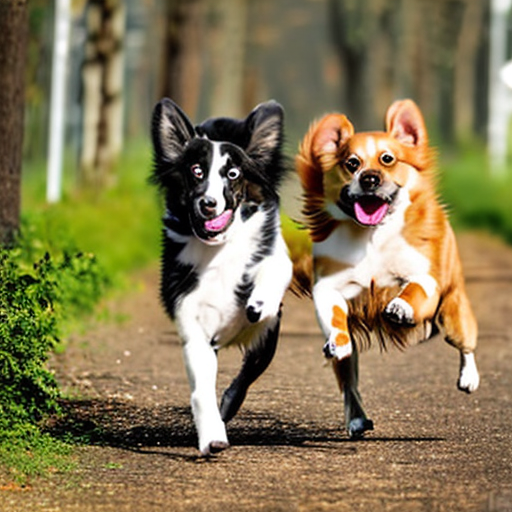
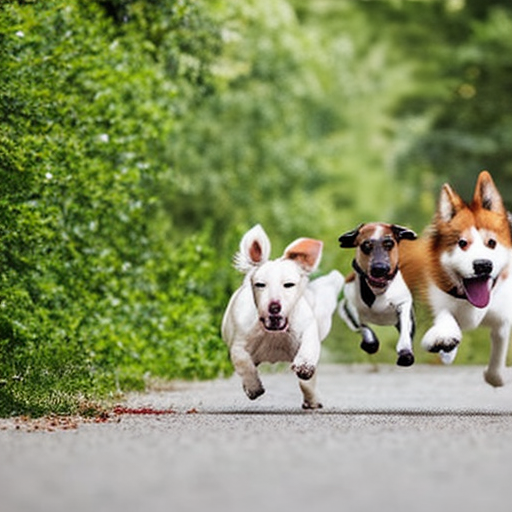
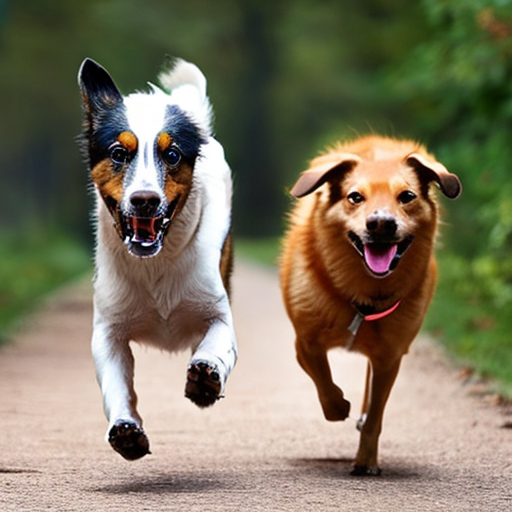
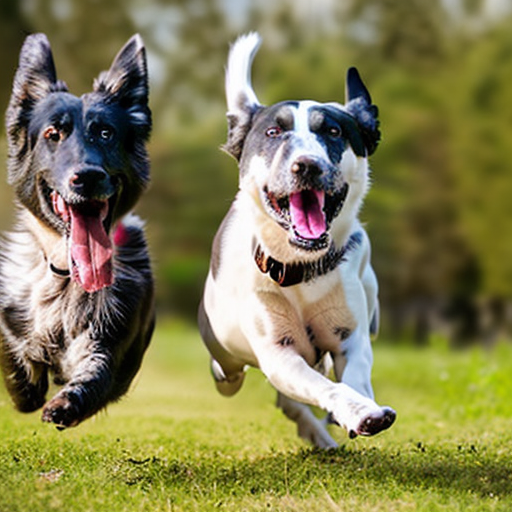

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:06<00:00,  3.69it/s]


with negative prompt:



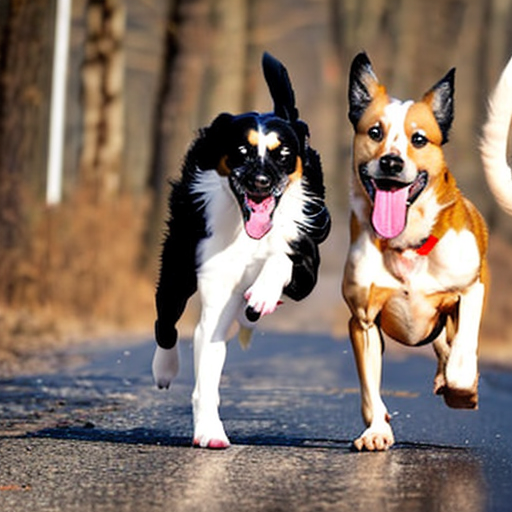
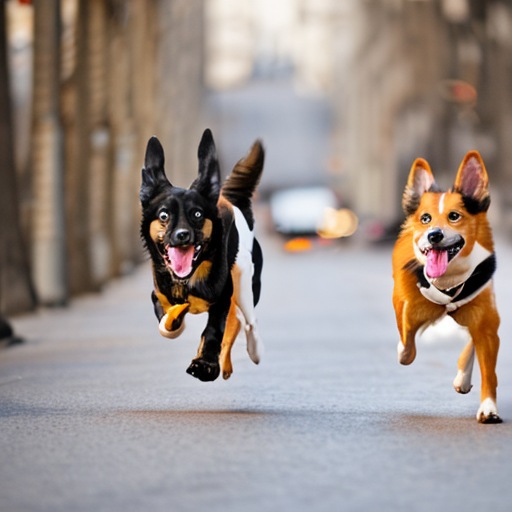
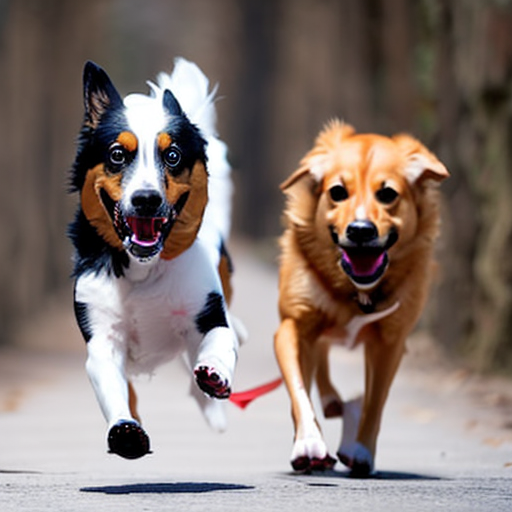
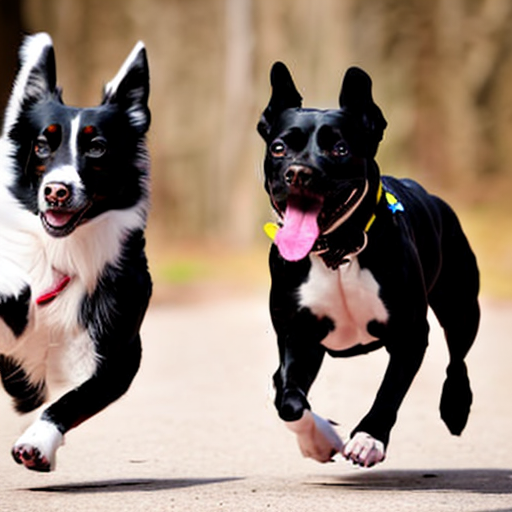

In [8]:
num_images = 4
guidance_scale = 9
num_inference_steps = 25
seed = 0

print(f"prompt: {prompt}")
print(f"negative prompt: {negative_prompt}")

set_random_seed(seed)
images = pipe(
    prompt,
    num_images_per_prompt=num_images,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=image_length,
    width=image_length,
    ).images
print(f"without negative prompt:")
media.show_images(images)

set_random_seed(seed)
images = pipe(
    prompt,
    num_images_per_prompt=num_images,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=image_length,
    width=image_length,
    negative_prompt=negative_prompt,
    ).images

print(f"with negative prompt:")
media.show_images(images)